In [1]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

import tensorflow.python as tf
from tensorflow.python import keras
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
cover_data = pd.read_csv('cover_data.csv')

## Preprocessing data

In [3]:
cover_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
np.isnan(cover_data).any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type7                            False
Soil_Type8                            False
Soil_Type9                      

In [5]:
cover_data.isnull().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type7                            False
Soil_Type8                            False
Soil_Type9                      

In [6]:
cover_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
cover_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
list(set(cover_data.dtypes.tolist()))

[dtype('int64')]

In [9]:
print(Counter(cover_data['class']))

Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


In [10]:
class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']

d:\ProgramFiles\anaconda3\envs\mlpy39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


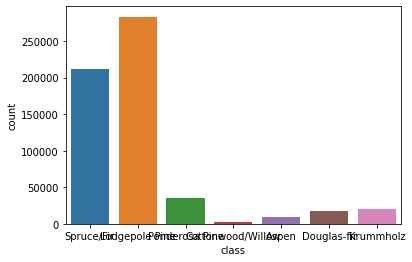

In [11]:
g = sns.countplot(cover_data['class']) #to show that data are imbalanced
g.set_xticklabels(class_names)
plt.show()

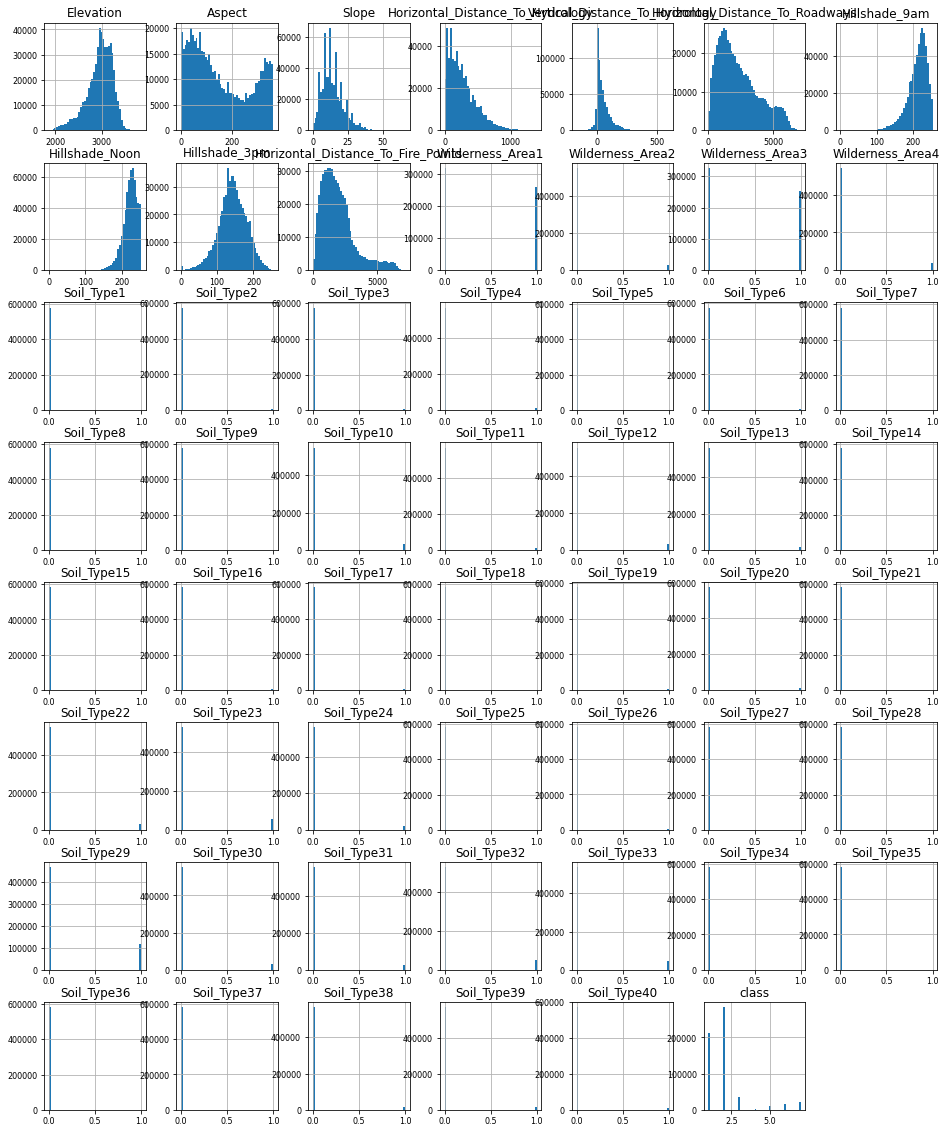

In [12]:
cover_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [13]:
cover_data_corr = cover_data.corr()['class'][:-1]

In [14]:
print(cover_data_corr[abs(cover_data_corr)>0.05].sort_values(ascending=False))

Wilderness_Area4                      0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Slope                                 0.148285
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Wilderness_Area3                      0.066846
Soil_Type14                           0.065562
Soil_Type33                          -0.062502
Soil_Type31                          -0.065347
Soil_Type24                          -0.068746
Soil_Type32  

In [15]:
X = cover_data.iloc[:,:-1]
y = cover_data['class']

In [16]:
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

d:\ProgramFiles\anaconda3\envs\mlpy39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


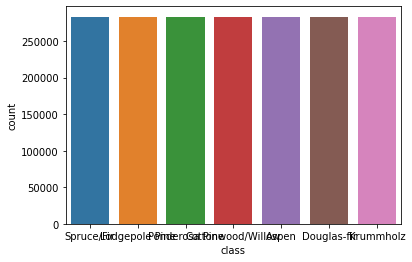

In [17]:
g = sns.countplot(y) #to show that data are imbalanced
g.set_xticklabels(class_names)
plt.show()

In [18]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y.head()

0    5
1    5
2    2
3    2
4    5
Name: class, dtype: int64

In [20]:
y=y-1 # to make it start from zero 

In [21]:
y.head()

0    4
1    4
2    1
3    1
4    4
Name: class, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.3, random_state=42)

In [23]:
features = X.columns.to_list()
print(features)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


In [24]:

ct = ColumnTransformer([('scale', StandardScaler(), features)], remainder='passthrough')
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)
X_test_scaled[:1]


array([[ 0.01349728, -0.43950929, -0.18215078, -0.94754382, -0.80382291,
         0.22886259,  1.05256552,  0.09122546, -0.75492228,  1.09965838,
         1.79158508, -0.1855594 , -0.84937848, -0.67040429, -0.15609203,
        -0.2074748 , -0.26322574, -0.24151872, -0.10582537, -0.21559306,
        -0.0073994 , -0.00937512, -0.02422242, -0.40402792, -0.1653236 ,
        -0.12596686, -0.18507907, -0.10642236, -0.00600165, -0.08479076,
        -0.20458713, -0.05834807, -0.05949301, -0.09072171, -0.02564001,
        -0.15045223, -0.22972922, -0.12751014, -0.01610592, -0.05683075,
        -0.02934047, -0.02511418, -0.30849919,  4.42057684, -0.14781993,
        -0.21468034, -0.20882159, -0.0393761 , -0.08516916, -0.02115539,
        -0.04580163, -0.22647333, -0.21474459, -0.17173188]])

In [25]:
y_train_oh = to_categorical(y_train, dtype='int32')
y_test_oh = to_categorical(y_test, dtype='int32')
y_train_oh[:10]

array([[0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0]])

## Making the model

In [26]:
model = Sequential(name="my_model")
model.add(layers.Input(shape=(len(features),)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(y_train_oh.shape[1], activation='softmax'))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1760      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 63 

In [27]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizer_v2.adam.Adam(learning_rate=0.001), metrics=['accuracy'])

In [28]:
cb = EarlyStopping(monitor="val_loss",
                    min_delta=0.0001,
                    patience=3,
                    verbose=0,
                    mode="auto",
                    baseline=None,
                    restore_best_weights=False
                  )

## Train the model

In [29]:
history = model.fit(X_train_scaled, y_train_oh, epochs=20, batch_size=10, verbose=1, callbacks=[cb], validation_split=0.3)

Epoch 1/20
97173/97173 [==============================] - 78s 785us/step - loss: 0.9052 - accuracy: 0.6089 - val_loss: 0.6707 - val_accuracy: 0.6905
Epoch 2/20
97173/97173 [==============================] - 81s 835us/step - loss: 0.8335 - accuracy: 0.6361 - val_loss: 0.6612 - val_accuracy: 0.6931
Epoch 3/20
97173/97173 [==============================] - 81s 829us/step - loss: 0.8219 - accuracy: 0.6420 - val_loss: 0.6425 - val_accuracy: 0.7074
Epoch 4/20
97173/97173 [==============================] - 84s 868us/step - loss: 0.8172 - accuracy: 0.6457 - val_loss: 0.6249 - val_accuracy: 0.7149
Epoch 5/20
97173/97173 [==============================] - 84s 867us/step - loss: 0.8110 - accuracy: 0.6465 - val_loss: 0.6213 - val_accuracy: 0.7088
Epoch 6/20
97173/97173 [==============================] - 89s 913us/step - loss: 0.8149 - accuracy: 0.6478 - val_loss: 0.6282 - val_accuracy: 0.7142
Epoch 7/20
97173/97173 [==============================] - 91s 936us/step - loss: 0.8035 - accuracy: 0.6498

## Evaluate the model

In [30]:
loss, acc = model.evaluate(X_test_scaled, y_test_oh, verbose=0)
print(f'loss: {loss}, accuracy: {acc}')

loss: 0.614597499370575, accuracy: 0.7181127667427063


In [31]:
def plot_history(history, param):
    """
    Shows how the model performs (in terms of accuracy and loss) over several epochs.
    """
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

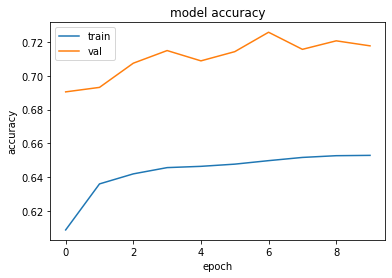

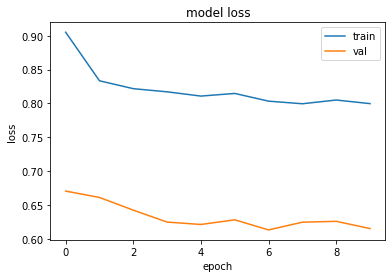

In [32]:
plot_history(history, 'acc')
plot_history(history, 'loss')

In [33]:
y_estimate_oh = model.predict(X_test_scaled)
y_estimate = np.argmax(y_estimate_oh, axis=1)
y_true = np.argmax(y_test_oh, axis=1)
print(classification_report(y_true, y_estimate, target_names=class_names))

                   precision    recall  f1-score   support

       Spruce/Fir       0.70      0.59      0.64     84990
   Lodgepole Pine       0.67      0.59      0.63     84990
   Ponderosa Pine       0.56      0.24      0.34     84990
Cottonwood/Willow       0.93      0.92      0.93     84991
            Aspen       0.78      0.94      0.86     84991
      Douglas-fir       0.51      0.85      0.64     84990
        Krummholz       0.91      0.88      0.90     84991

         accuracy                           0.72    594933
        macro avg       0.72      0.72      0.70    594933
     weighted avg       0.72      0.72      0.70    594933



In [34]:
matrix_confusion = confusion_matrix(y_true, y_estimate)
print(matrix_confusion)

[[50102 24701     0     0  3134   302  6751]
 [12094 50462    12     4 16816  5329   273]
 [    0     0 20430  4636  1266 58658     0]
 [    0     0  5682 78599     0   710     0]
 [    0   371     0     0 80294  4326     0]
 [    0    38 10126  1448  1163 72215     0]
 [ 9487   280     0     0    97     0 75127]]


[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

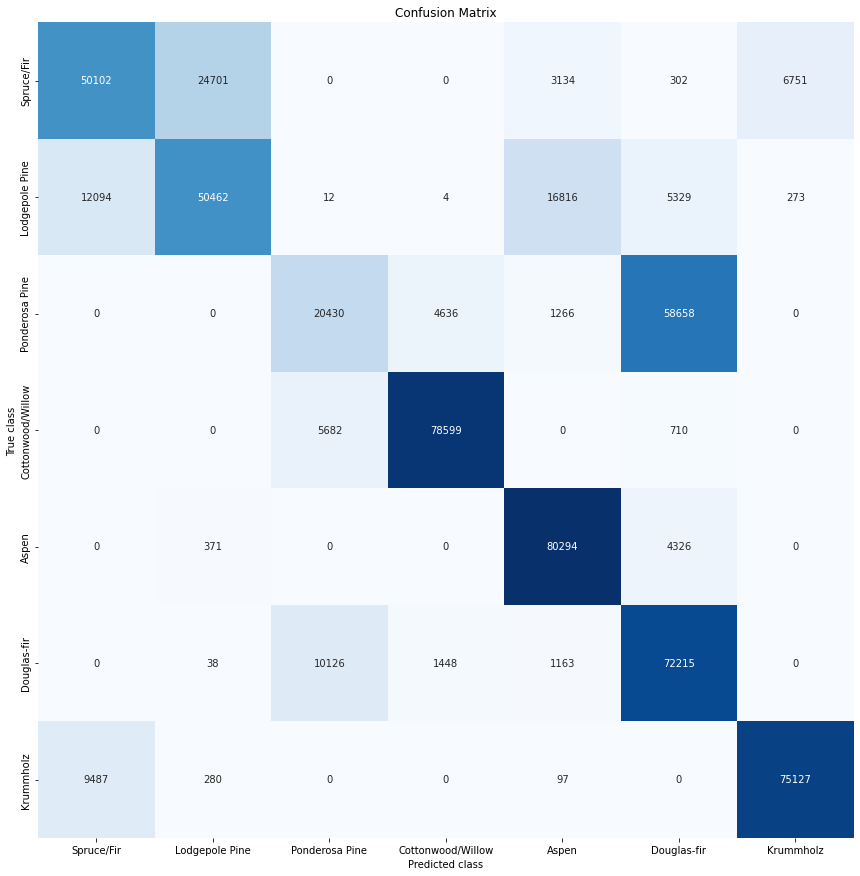

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='g', cbar=False)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)